## Part 1 ‐ Exploratory data analysis

In [576]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statistics 

In [577]:
#df = pd.read_json('ultimate_data_challenge.json')
df = pd.read_json ('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [579]:
# resample login time to 15 min intervals 
df = df.set_index(['login_time'])
df['count'] = 0
df = df.resample('15Min').count()

In [580]:
df = df.reset_index()
df.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [581]:
# retrieve weekdays and hours from login time 
df['day_of_the_week'] = df['login_time'].dt.day_name()
df['hour'] = df['login_time'].dt.hour
df.head()

,login_time,count,day_of_the_week,hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


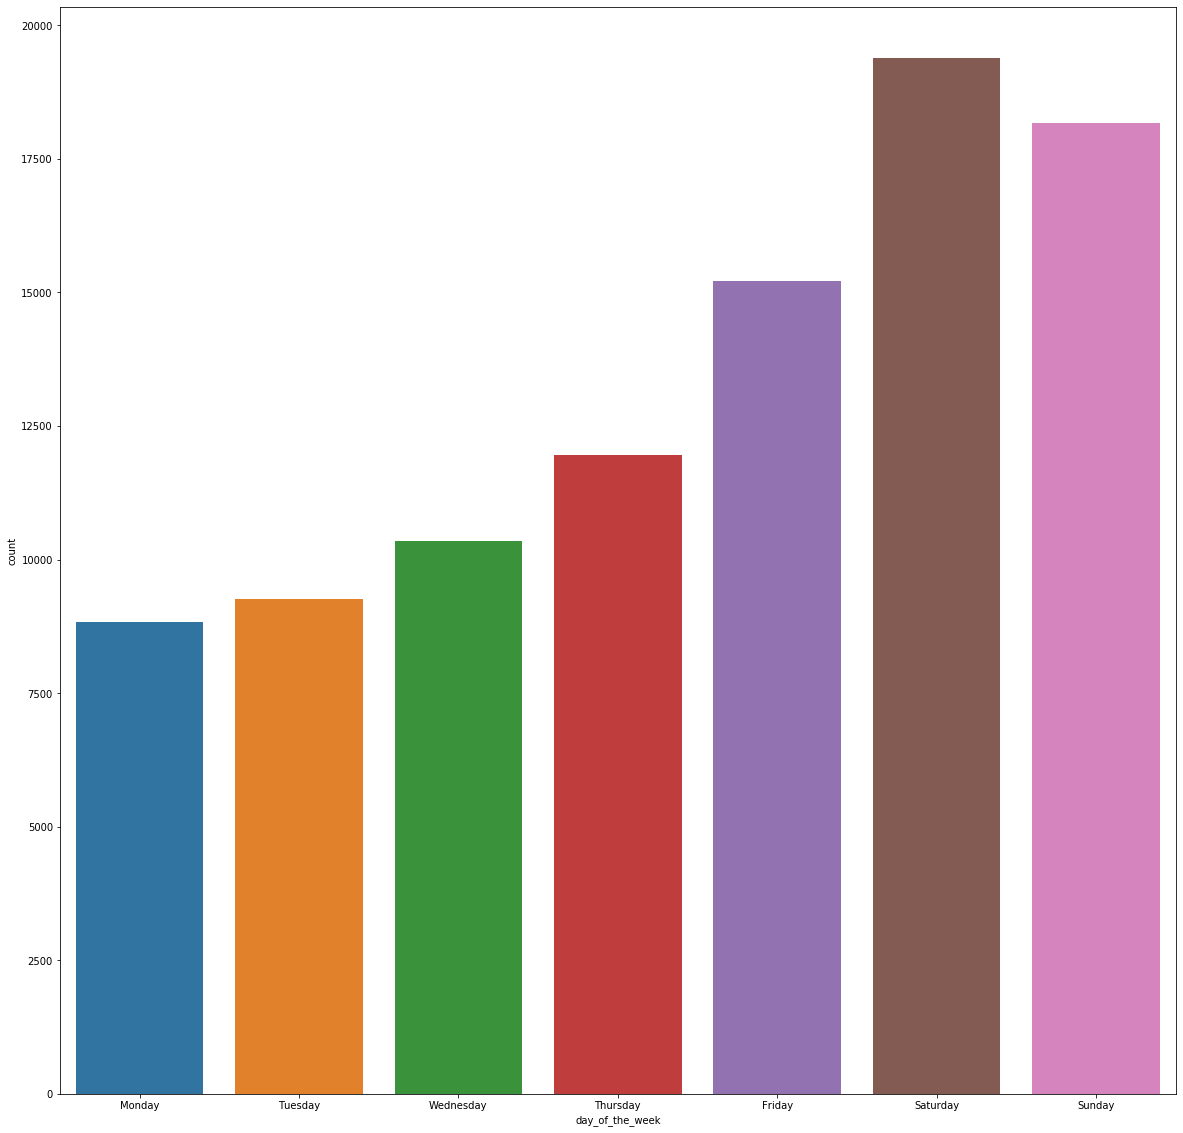

In [582]:
# group login times by the day of the week
df_weekday = df[['count', 'day_of_the_week']]
df_weekday = df_weekday.groupby('day_of_the_week').sum().reset_index()

# barplot of logins by the days of the week
plt.figure(figsize=(20,20))
sns.barplot(x='day_of_the_week', y='count', data = df_weekday, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] )

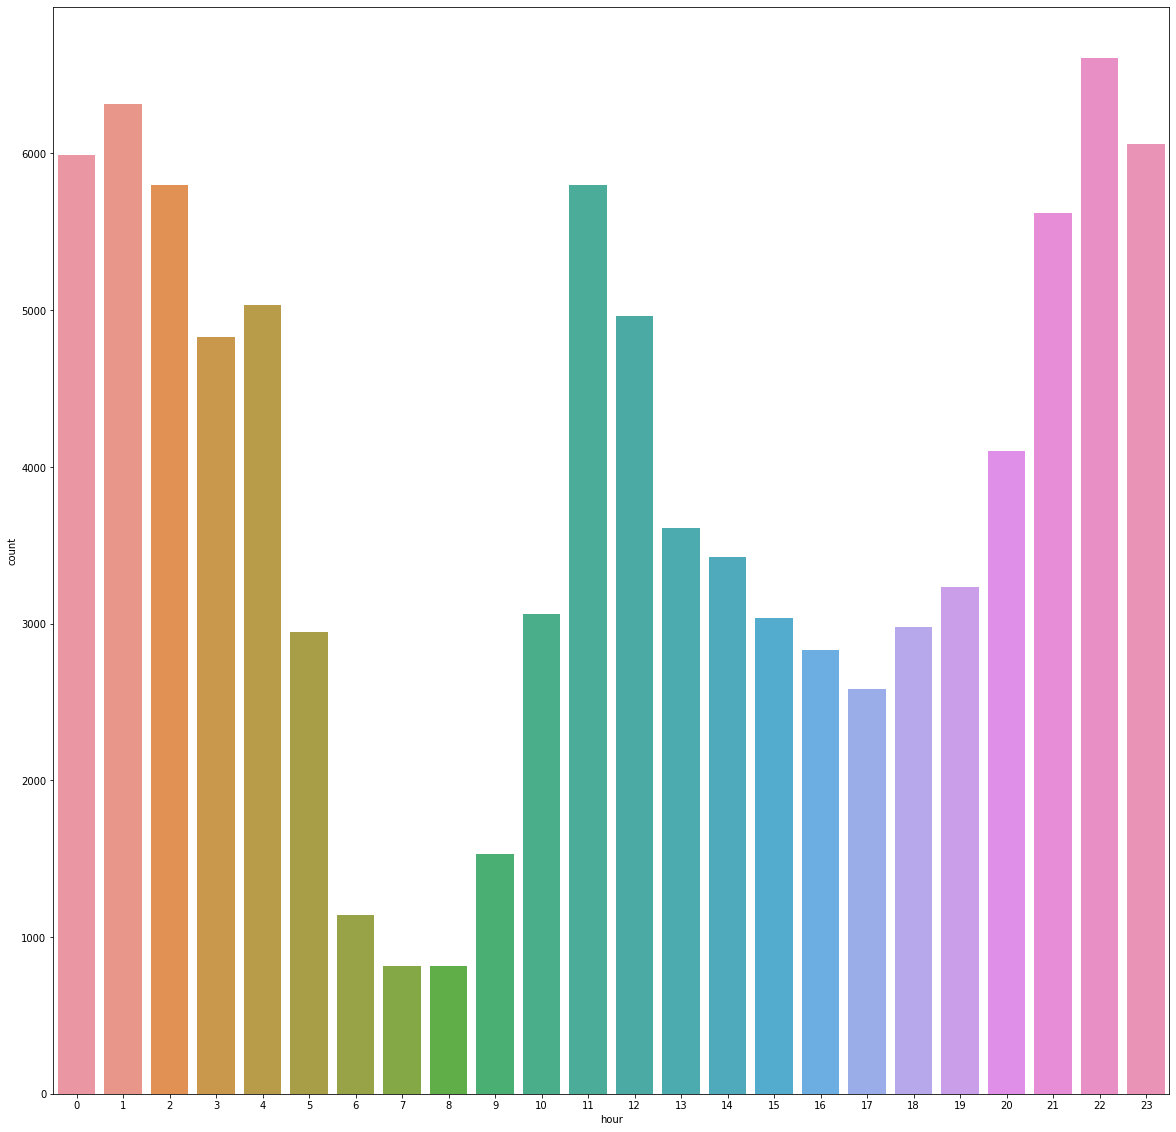

In [583]:
# group by the login hours of a day
df_hour = df[['count', 'hour']]
df_hour = df_hour.groupby('hour').sum().reset_index()

#barplot of logins by hour 
plt.figure(figsize=(20,20))
sns.barplot(x='hour', y='count', data=df_hour)

## Part 2 ‐ Experiment and metrics design

The purpose of this experiment is to increase the driver availability for both cities, this will significantly reduce wait times for customers. If Ultimate is paying for the toll charges for the drivers, they need to make sure that more customers are using their service so that they are profitable. The key measures of success would be Ultimate's profit margins after all expenses are paid (driver, toll fee, etc.), the wait times for drivers to reach the customers, the number of times drivers had to use the toll bridge per day and the most frequent hours of the day drivers used the toll bridge. 

I would use A/B testing to compare pre-toll versus post-toll reimbursement. This will help to analyze the benefits it has towards the drivers, customers and if it is sustainable for the company. For the statistical test, I would use a t-test with a 95% confidence level. The null hypothesis would be that the company is not more profitable by implementing the toll reimbursement for the drivers.

If the null hypothesis is rejected, I would run more tests to ensure the probability of it suceeding. This test alone may not be as helpful, tests need to be run on the drivers and consumers.  

## Part 3 ‐ Predictive modeling

In [678]:
import json 

file = open("ultimate_data_challenge.json", "r")
df = pd.DataFrame(json.load(file))
file.close

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [680]:
# replace nan values with the mean value 
df['avg_rating_of_driver'] = df.avg_rating_of_driver.fillna(df['avg_rating_of_driver'].mean())
df['avg_rating_by_driver'] = df.avg_rating_of_driver.fillna(df['avg_rating_by_driver'].mean())

# replace nan value with 'other' as it may not be either an apple or android product
df['phone'] = df['phone'].fillna('Other')

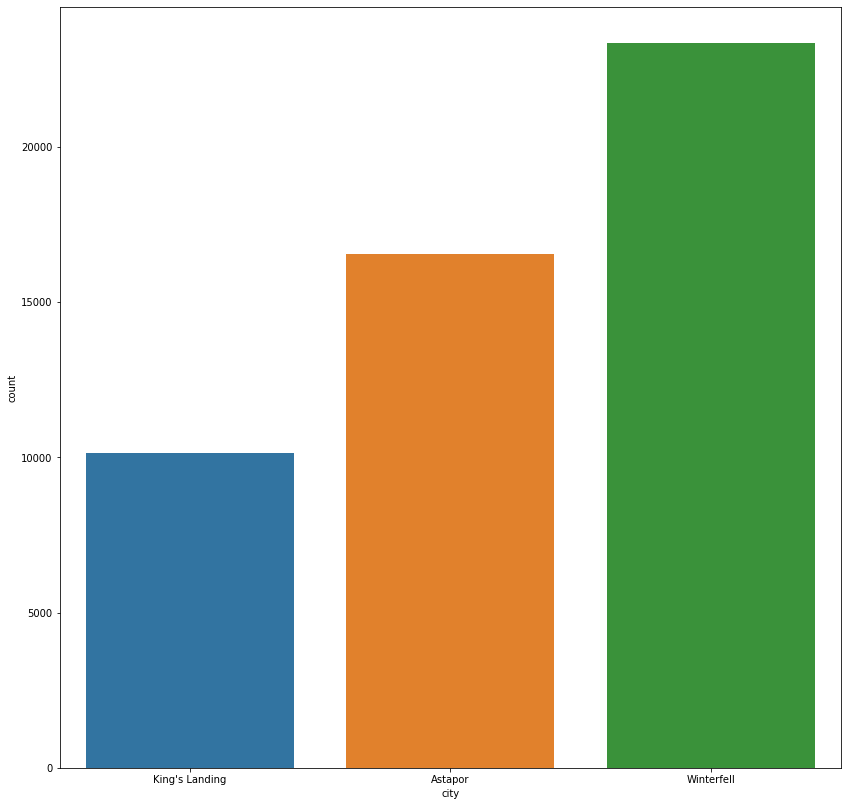

In [681]:
# countplot of drivers by city 
plt.figure(figsize=(14,14))
sns.countplot('city', data=df)

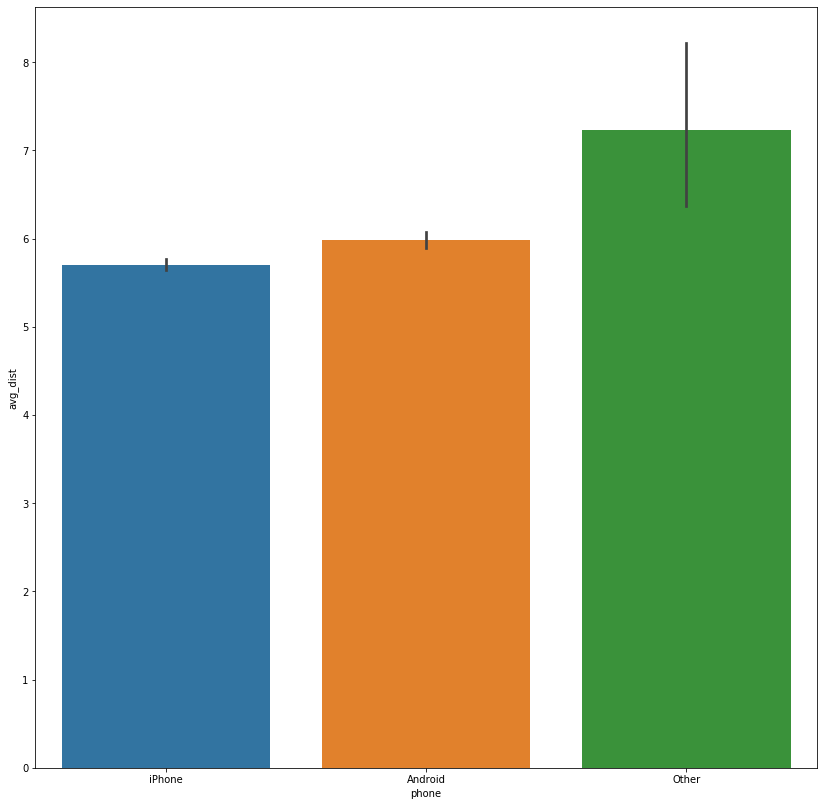

In [682]:
# barplot of the drivers average distance versus phone
plt.figure(figsize=(14,14))
sns.barplot(y = 'avg_dist', x = 'phone', data=df)

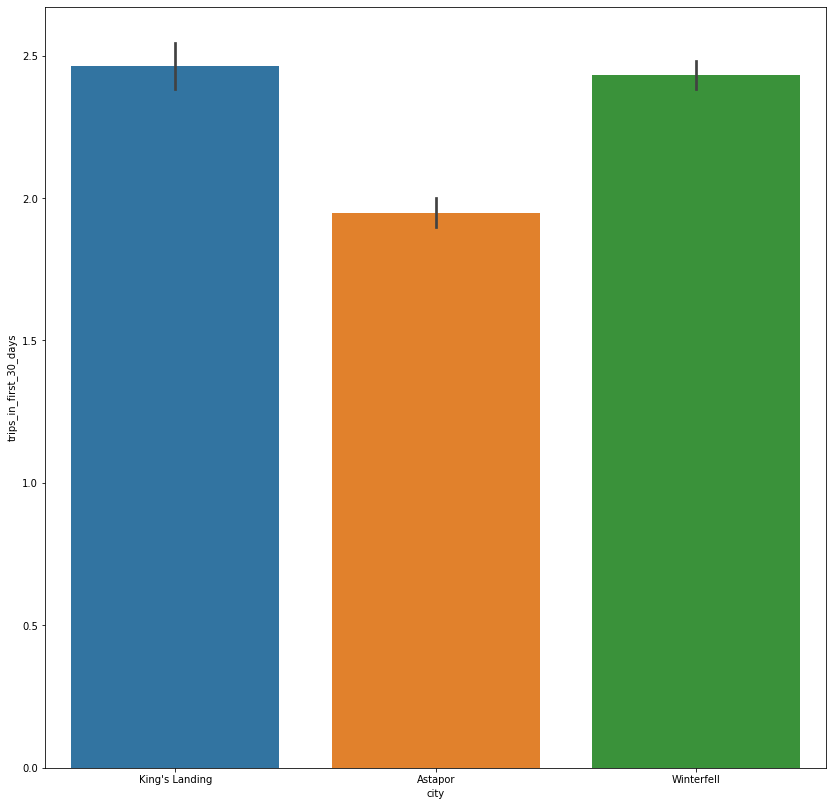

In [683]:
# barplot of drivers trips in the first 30 days versus the city
plt.figure(figsize=(14,14))
sns.barplot(y = 'trips_in_first_30_days', x = 'city', data=df)

In [684]:
from datetime import timedelta
import calendar

# convert strings to timestamps 
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])


df['active'] = df['last_trip_date'] - df['signup_date'] > timedelta(150)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,4.7,False
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,4.3,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.6,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.4,False


In [688]:
df['active'] = df['active'].astype(int)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,4.7,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,4.3,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.6,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.4,0


In [689]:
# Drop both 'signup_date' and 'last_trip_date'
df.drop(['signup_date', 'last_trip_date'], axis=1)

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.700000,1.10,iPhone,15.4,True,46.2,3.67,4.700000,0
1,Astapor,0,5.000000,1.00,Android,0.0,False,50.0,8.26,5.000000,0
2,Astapor,3,4.300000,1.00,iPhone,0.0,False,100.0,0.77,4.300000,0
3,King's Landing,9,4.600000,1.14,iPhone,20.0,True,80.0,2.36,4.600000,1
4,Winterfell,14,4.400000,1.19,Android,11.8,False,82.4,3.13,4.400000,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.000000,1.00,iPhone,0.0,False,100.0,5.63,5.000000,0
49996,Astapor,1,4.601559,1.00,iPhone,0.0,False,0.0,0.00,4.601559,0
49997,Winterfell,0,5.000000,1.00,Android,0.0,True,100.0,3.86,5.000000,0
49998,Astapor,2,3.000000,1.00,iPhone,0.0,False,100.0,4.58,3.000000,0


In [690]:
# split data into x and y
y = df['active']
x = df.drop(['active'], axis = 1 )

In [691]:
# convert categorical variables into dummy variables
df = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Other,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,4.7,0,0,1,0,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,4.3,0,1,0,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.6,1,0,1,0,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.4,0,0,0,1,1,0,0,1,0


In [692]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

# Use Standard Scaler to scale the numerical values 
num_col = ["trips_in_first_30_days","avg_rating_of_driver", "avg_surge", "surge_pct", "weekday_pct", "avg_dist", "avg_rating_by_driver" ]
scaler = StandardScaler()
x = scaler.fit_transform(x[num_col])

In [693]:
from sklearn.model_selection import train_test_split 

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [701]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
from sklearn.metrics import classification_report

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,   y_train)

y_pred = dtc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", str(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.7223
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      7534
           1       0.43      0.41      0.42      2466

    accuracy                           0.72     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.72      0.72      0.72     10000



In [700]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", str(accuracy))
print(classification_report(y_test, y_pred))

/Users/grannelpinto/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.7389
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      7534
           1       0.46      0.34      0.39      2466

    accuracy                           0.74     10000
   macro avg       0.63      0.61      0.61     10000
weighted avg       0.72      0.74      0.73     10000



In [703]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm = lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", str(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.7574
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7534
           1       0.57      0.07      0.12      2466

    accuracy                           0.76     10000
   macro avg       0.67      0.53      0.49     10000
weighted avg       0.72      0.76      0.68     10000



/Users/grannelpinto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [704]:
# SVC 
from sklearn.svm import SVC
svc = SVC()
svc = svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", str(accuracy))
print(classification_report(y_test, y_pred))

/Users/grannelpinto/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.7721
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      7534
           1       0.59      0.24      0.35      2466

    accuracy                           0.77     10000
   macro avg       0.69      0.59      0.60     10000
weighted avg       0.74      0.77      0.73     10000



In [706]:
# Tune the SVC Model using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10, 100],
             'gamma': [1, 0.1, 0.01, 0.001], 
             }

tuned_svc = GridSearchCV(estimator= svc, param_grid=param_grid, cv= 5)
tuned_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [707]:
# After tuning the SVC Model 
y_pred = tuned_svc.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:", str(accuracy))
print(classification_report(y_test, y_pred))

Accuracy: 0.7802
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      7534
           1       0.60      0.33      0.43      2466

    accuracy                           0.78     10000
   macro avg       0.70      0.63      0.65     10000
weighted avg       0.76      0.78      0.76     10000

